In [23]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin, cos, pi
from scipy.integrate import solve_ivp


In [24]:
# Однородный тонкий стержень длины L, масса m, подвес в одном конце.
m = 10.0  # масса 
L = 10.0  # длина стержня 
g = 9.81 

I = (1.0 / 3.0) * m * L**2
d = L / 2.0



In [25]:
# ------------------------ ОДУ ------------------------
# Правые части ОДУ: theta' = omega, omega' = - (b/I) * omega - (m g d / I) * sin(theta)
def deriv(t, y):
    theta, omega = y
    return np.array([omega, -(b / I) * omega - (m * g * d / I) * np.sin(theta)])



def integrate(theta0, omega0, t_max, b):
    y0 = [theta0, omega0]
    t_span = (0, t_max)
    t_eval = np.linspace(*t_span, 5000)

    def deriv(t, y):
      theta, omega = y
      return np.array([omega, -(b / I) * omega - (m * g * d / I) * np.sin(theta)])
    
    sol = solve_ivp(deriv, t_span, y0, t_eval=t_eval)
    t = sol.t
    theta = sol.y[0]
    omega = sol.y[1]
    return t, theta, omega


In [26]:
# ------------------------ Энергия ------------------------
def energy(theta, omega):
    KE = 0.5 * I * omega**2
    PE = m * g * d * (1 - np.cos(theta))
    return KE + PE




In [27]:
def find_peaks(t, theta):
    peaks_t = []
    peaks_theta = []
    for i in range(1, len(theta) - 1):
        if theta[i - 1] < theta[i] and theta[i] > theta[i + 1]:
            peaks_t.append(t[i])
            peaks_theta.append(theta[i])
    return np.array(peaks_t), np.array(peaks_theta)


def estimate_period_from_peaks(t, theta):
    peaks_t, peaks_theta = find_peaks(t, theta)
    if len(peaks_t) < 1:
        return None, None, None
    periods = np.diff(peaks_t)
    return np.mean(periods), peaks_t, peaks_theta


# from scipy.signal import find_peaks

# def find_peaks_scipy(t, theta, height=None, distance=None):
#     """
#     Находит пики функции theta(t) с помощью scipy.signal.find_peaks.
#     Можно задавать минимальную высоту пика (height) и минимальное расстояние между пиками (distance).
#     """
#     peaks_indices, properties = find_peaks(theta, height=height, distance=distance)
#     peaks_t = t[peaks_indices]
#     peaks_theta = theta[peaks_indices]
#     return peaks_t, peaks_theta

# def estimate_period_from_peaks(t, theta, height=None, distance=None):
#     """
#     Оценивает период колебаний через пики.
#     Возвращает средний период и массивы времени и амплитуд пиков.
#     """
#     print(theta)
#     peaks_t, peaks_theta = find_peaks_scipy(t, theta, height=height, distance=distance)
#     if len(peaks_t) == 0:
#         return None, peaks_t, peaks_theta
#     periods = np.diff(peaks_t)
#     return np.mean(periods), peaks_t, peaks_theta

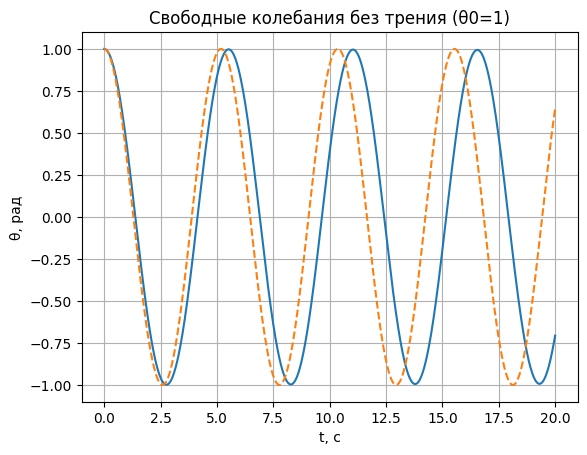

T = 5.517103420684137
T_an =  5.179035807161432


In [28]:

theta_0 = 1
omega_0 = 0.0
omega_freq0 = np.sqrt(m * g * d / I)
b = 0.0
t_max = 20.0
t1, th1, om1 = integrate(theta0=theta_0, omega0=omega_0, t_max=t_max, b=0)
# theta(t) = theta_0 * cos(omega_freq0*t + alpha)
# omega_freq0 = sqrt(mgd/I)

theta_an1 = theta_0 * np.cos(omega_freq0* t1)
omega_an1 = -theta_0 * omega_freq0 * np.sin(omega_freq0 * t1)
plt.figure()
plt.plot(t1, th1)
plt.plot(t1, theta_an1, "--", label="Аналитическое")
plt.xlabel("t, с")
plt.ylabel("θ, рад")
plt.title(f"Свободные колебания без трения (θ0={theta_0})")
plt.grid(True)
plt.show()
print('T =', estimate_period_from_peaks(t1, th1)[0])
print('T_an = ',estimate_period_from_peaks(t1, theta_an1)[0])

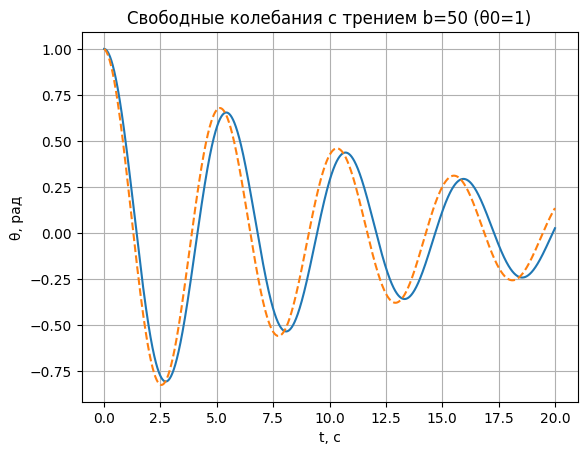

T =  5.261052210442088
T_an =  5.191038207641528


In [29]:
b = 50

t2, th2, om2 = integrate(theta0=theta_0, omega0=omega_0, t_max=t_max, b=b)

# theta(t) = theta_0 * e ^ (-beta * t) * cos(omega_d * t + alpha)
# omega_d = sqrt( omega_0^2 - eta^2), omega_0 = sqrt( mgd / I)
beta = b / (2 * I)
omega_freq0 = np.sqrt(m * g * d / I)
omega_d = np.sqrt(omega_freq0**2 - beta**2)
theta_an2 = theta_0 * np.exp(-beta * t2) * np.cos(omega_d * t2)
omega_an2 = -theta_0 * np.exp(-beta * t2) * (beta * np.cos(omega_d * t2) + omega_d * np.sin(omega_d * t2))

plt.figure()
plt.plot(t2, th2)
plt.plot(t2, theta_an2, "--", label="Аналитическое")
plt.xlabel("t, с")
plt.ylabel("θ, рад")
plt.title(f"Свободные колебания с трением b={b} (θ0={theta_0})")
plt.grid(True)
plt.show()

print('T = ', estimate_period_from_peaks(t2, th2)[0])
print('T_an = ',estimate_period_from_peaks(t2, theta_an2)[0])

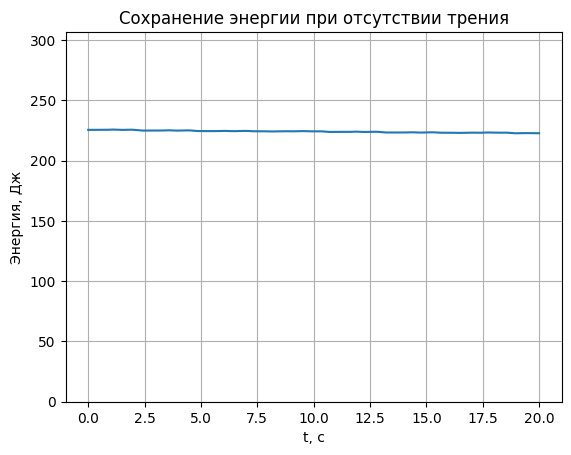

In [30]:
E1 = energy(th1, om1)
E_an1 = energy(theta_an1, omega_an1)
plt.figure()
plt.plot(t1, E1)
# plt.plot(t1, E_an1)
plt.xlabel("t, с")
plt.ylabel("Энергия, Дж")
plt.ylim(0, max(max(E1), max(E_an1))*1.25)
plt.title("Сохранение энергии при отсутствии трения")
plt.grid(True)
plt.show()

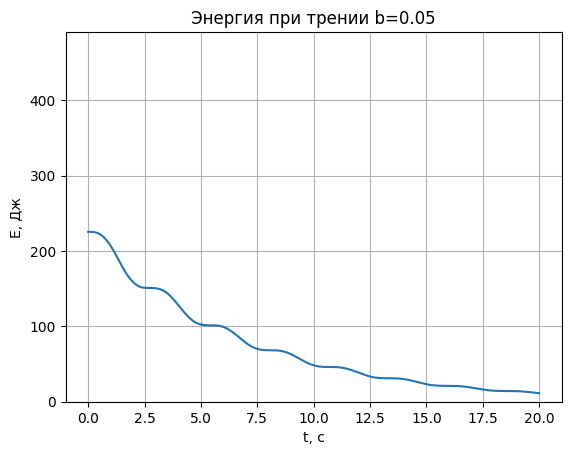

In [31]:
plt.figure()
E_an2 = energy(theta_an2, omega_an2)
plt.plot(t2, energy(th2, om2))
# plt.plot(t2, E_an2)
plt.xlabel("t, с")
plt.ylabel("E, Дж")
plt.ylim(0, max(max(E1), max(E_an1))*2)
plt.title("Энергия при трении b=0.05")
plt.grid(True)
plt.show()

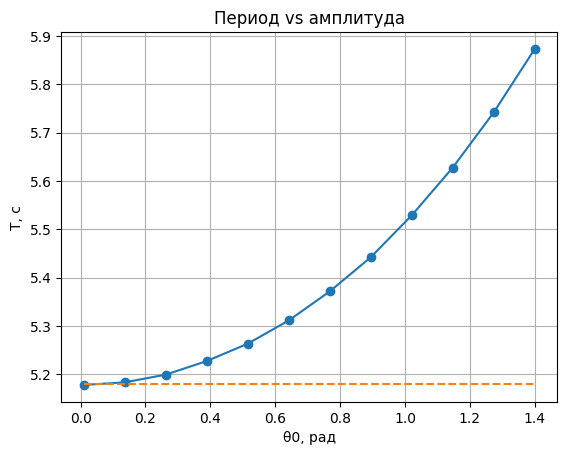

In [32]:
amps_plot = np.linspace(0.01, 1.4, 12)
T_numeric_list = []
T_theory_full_list = []
T_analytic_list = []
T_small_list = []
b = 0.0
for a in amps_plot:
    t, th, om = integrate(theta0=a, omega0=0.0, t_max=40.0, b=b)
    T_est, _, _ = estimate_period_from_peaks(t, th)
    T_numeric_list.append(T_est)
    # theta_0 = 2pi * sqrt (I/mgd)
    theta_0 = 2*pi*np.sqrt(I/(m*g*d))
    T_analytic_list.append(theta_0)

plt.figure()
plt.plot(amps_plot, T_numeric_list, marker="o", linestyle="-")
plt.plot(amps_plot, T_analytic_list, linestyle="--")
plt.xlabel("θ0, рад")
plt.ylabel("T, с")
plt.title("Период vs амплитуда")
plt.grid(True)
plt.show()

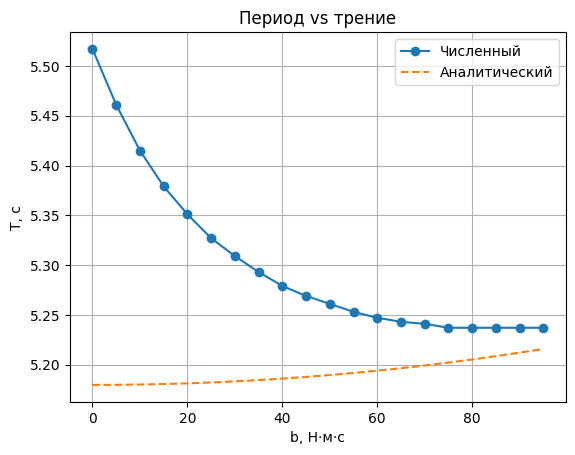

In [33]:
b_values = [1 * x for x in range(0, 100, 5)]
t_max2 = 20.0

results_b = []
T_analytic_b = []

omega_0 = np.sqrt(m * g * d / I)

for b_value in b_values:
    b = b_value

    t, th, om = integrate(theta0=1, omega0=0.0, t_max=t_max2, b=b)

    T_est, peaks_t, _ = estimate_period_from_peaks(t, th)
    if T_est is None:
        continue

    beta = b / (2 * I)

    # только режим колебаний (недокритическое затухание)
    if omega_0**2 > beta**2:
        omega_d = np.sqrt(omega_0**2 - beta**2)
        T_an = 2 * np.pi / omega_d
    else:
        continue

    results_b.append((b, T_est))
    T_analytic_b.append(T_an)

df_b = pd.DataFrame(
    results_b,
    columns=["b", "T_numeric_s"]
)

# --- график ---
plt.figure()
plt.plot(df_b["b"], df_b["T_numeric_s"], marker="o")
plt.plot(df_b["b"], T_analytic_b, "--")

plt.xlabel("b, Н·м·с")
plt.ylabel("T, с")
plt.title("Период vs трение")
plt.legend(["Численный", "Аналитический"])
plt.grid(True)
plt.show()
